Basic Information of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare       

C:\Users\Cesar Torres\AppData\Local\Temp\ipykernel_21160\430036739.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data_cleaned['Age'].fillna(median_age, inplace=True)
C:\Users\Cesar Torres\AppData\Local\Temp\ipykernel_21160\430036739.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

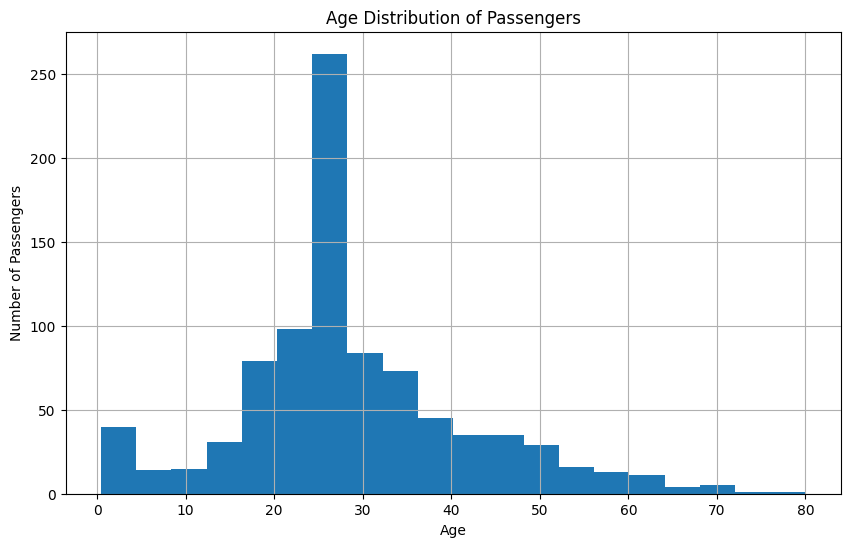

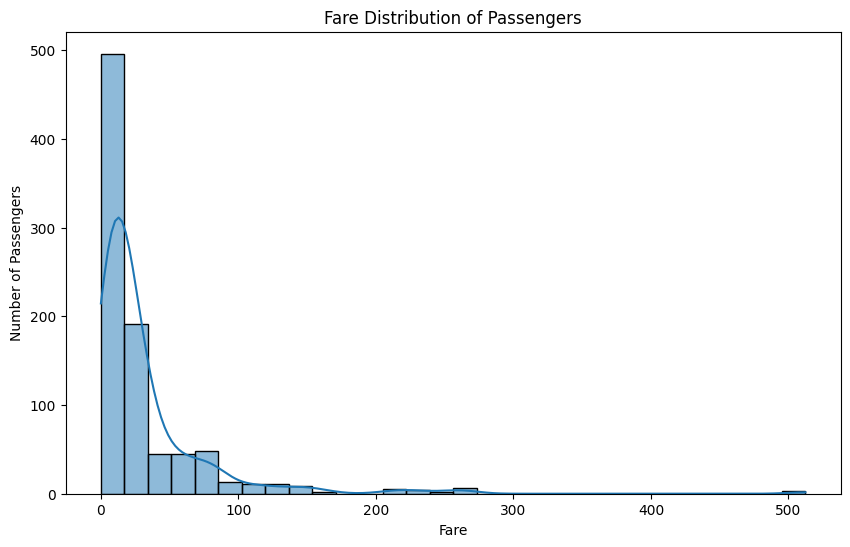

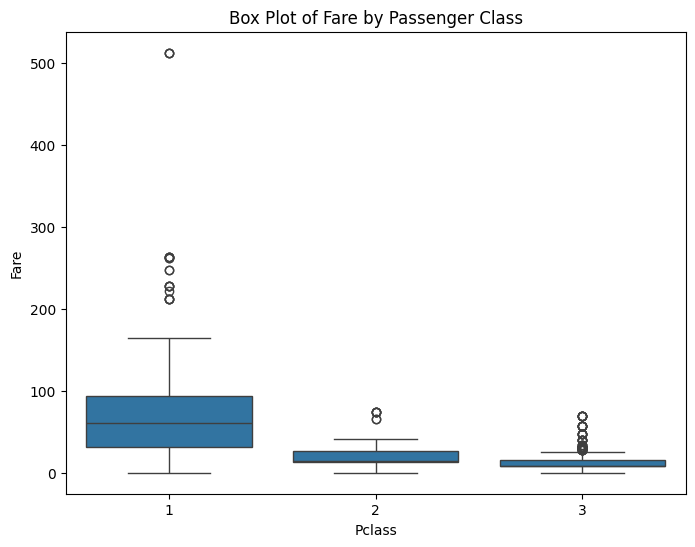

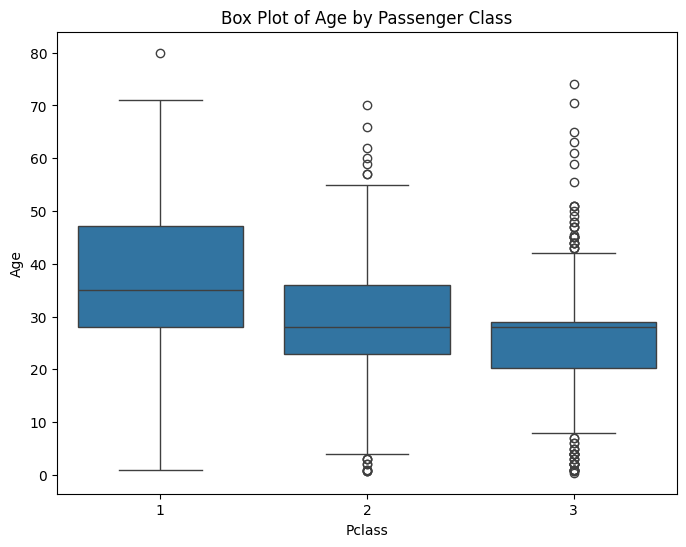

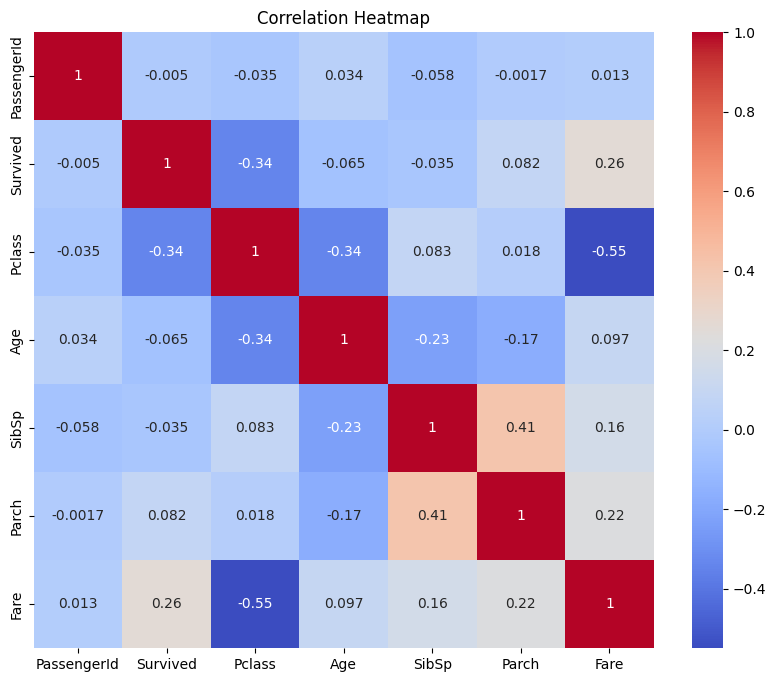


Accuracy of Random Forest model: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       105
           1       0.87      0.65      0.74        74

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



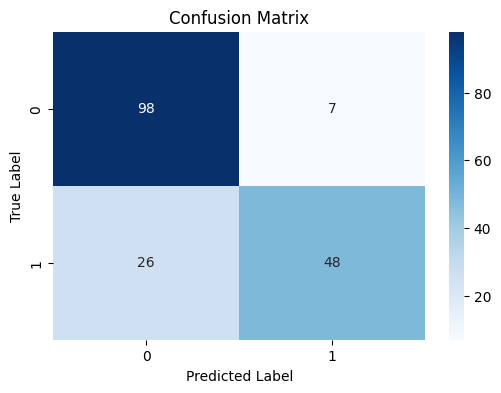

C:\Users\Cesar Torres\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Cesar Torres\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Cesar Torres\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Cesar Torres\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [4]:
# Titanic Dataset Project - Data Cleaning, EDA, and Prediction
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import statsmodels.api as sm

# Step 2: Load the Titanic dataset
file_path = "Titanic-Dataset.csv"  # Update path if needed
titanic_data = pd.read_csv(file_path)

# Step 3: Display basic info about the dataset
print("Basic Information of Dataset:")
titanic_data.info()  # Shows data types and missing values

# Check for missing values in each column
missing_values = titanic_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Step 4: Describe the numerical columns to get basic statistics
print("\nSummary statistics of numerical columns:")
print(titanic_data.describe())

# Step 5: Check the first few rows of the dataset to understand the structure
print("\nFirst 5 rows of the dataset:")
print(titanic_data.head())

# Step 6: Handle missing values
# Drop 'Cabin' column due to excessive missing data
titanic_data_cleaned = titanic_data.drop(columns=['Cabin'], axis=1)

# Fill missing 'Age' values with the median age
median_age = titanic_data_cleaned['Age'].median()
titanic_data_cleaned['Age'].fillna(median_age, inplace=True)

# Fill missing 'Embarked' values with the mode (most frequent value)
mode_embarked = titanic_data_cleaned['Embarked'].mode()[0]
titanic_data_cleaned['Embarked'].fillna(mode_embarked, inplace=True)

# Step 7: Visualize the distribution of numerical columns
plt.figure(figsize=(10, 6))
titanic_data_cleaned['Age'].hist(bins=20)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(titanic_data_cleaned['Fare'], bins=30, kde=True)
plt.title("Fare Distribution of Passengers")
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.show()

# Step 8: Check for outliers using box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_data_cleaned)
plt.title("Box Plot of Fare by Passenger Class")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic_data_cleaned)
plt.title("Box Plot of Age by Passenger Class")
plt.show()

# Step 9: Explore the correlation between numerical variables (Fixed to avoid ValueError)
# Filter only numeric columns for correlation
numeric_data = titanic_data_cleaned.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns
plt.figure(figsize=(10, 8))
corr_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 10: Convert categorical columns to numerical values using dummy encoding
titanic_data_cleaned = pd.get_dummies(titanic_data_cleaned, drop_first=True)

# Step 11: Split data into training and testing sets
X = titanic_data_cleaned.drop('Survived', axis=1)
y = titanic_data_cleaned['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 12: Scale the features (Standardize the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 13: Build a Random Forest Classifier model to predict survival
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Step 14: Evaluate the model
y_pred = rf_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Random Forest model: {accuracy:.2f}")

# Step 15: Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 16: Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Step 17: Perform statistical analysis using logistic regression
# Logistic regression to check the impact of various factors on survival
X_train_with_const = sm.add_constant(X_train_scaled)
logit_model = sm.Logit(y_train, X_train_with_const)
result = logit_model.fit()

# Display the summary of the logistic regression model
print(result.summary())

# Step 18: Feature importance analysis for Random Forest model
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance from Random Forest Model")
plt.show()

# Step 19: Additional visualizations for further analysis
# Violin plot for age and survival
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Age', data=titanic_data)
plt.title("Violin Plot of Age by Survival")
plt.show()

# Pair plot for selected features
selected_features = ['Age', 'Fare', 'Pclass', 'Survived']
sns.pairplot(titanic_data_cleaned[selected_features], hue='Survived', diag_kind='kde')
plt.show()

# Step 20: Save the cleaned dataset
titanic_data_cleaned.to_csv("Titanic-Dataset-Cleaned.csv", index=False)
print("Cleaned dataset saved as 'Titanic-Dataset-Cleaned.csv'.")
